In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from plotnine import ggplot, aes, geom_histogram

$\DeclareMathOperator*{\MEAN}{\mathbf{E}}$
$\DeclareMathOperator*{\VARIANCE}{\mathbf{D}}$
$\newcommand{\mean}[1]{\MEAN\left[#1\right]}$
$\newcommand{\variance}[1]{\VARIANCE\left[#1\right]}$
$\newcommand{\prob}[1]{\Pr\left[#1\right]}$

## Relatiivse vea korrutise omadus

Mõnikord võib lähendatav suurus olla leitav ligikaudsete arvude korrutisena.
Näiteks riskülikukujulise põranda pindala leidmiseks peab korrutama põranda laiuse ja pikkuse, mis mõõtemääramatuse või vigase mõõteriista tõttu ei pruugi olla täpsed.

Olgu $x=x_0+\varepsilon_x$ ning $y=y_0+\varepsilon_y$, kus $\varepsilon_x\sim\mathcal{N}(0, \sigma_x)$ ja $\varepsilon_x\sim\mathcal{N}(0, \sigma_y)$ on sõltumatud.
Suuruste $X$ ja $Y$ korrutise relatiivne viga avaldub kujul
\begin{align*}
    \delta&=\frac{x\cdot y-x_0\cdot y_0}{x_0\cdot y_0}=\frac{(x_0+\varepsilon_x)\cdot(y_0+\varepsilon_y)-x_0\cdot y_0}{x_0\cdot y_0} \\
    &=\frac{x_0\cdot\varepsilon_y+y_0\cdot\varepsilon_x+\varepsilon_x\cdot\varepsilon_y}{x_0\cdot y_0}=\frac{\varepsilon_y}{y_0}+\frac{\varepsilon_x}{x_0}+\frac{\varepsilon_x}{x_0}\cdot\frac{\varepsilon_y}{y_0} \enspace.
\end{align*}
Vigade $\varepsilon_x$ ja $\varepsilon_y$ sõltumatuse tõttu on $\delta$ keskväärtus null.
Arvestades eelnevat saab tuletada korrutise relatiivse vea dispersiooni
\begin{align}
    \variance{\delta}&=\mean{\left(\frac{\varepsilon_y}{y_0}\right)^2 + \left(\frac{\varepsilon_x}{x_0}\right)^2 + \left(\frac{\varepsilon_x}{x_0}\cdot\frac{\varepsilon_y}{y_0}\right)^2 + 2\cdot\frac{\varepsilon_x\cdot\varepsilon_y}{x_0\cdot y_0} + 2\cdot\frac{\varepsilon_x^2\cdot\varepsilon_y}{x_0^2\cdot y_0} + 2\cdot\frac{\varepsilon_x\cdot\varepsilon_y^2}{x_0\cdot y_0^2}}\nonumber\\
    &=\mean{\left(\frac{\varepsilon_y}{y_0}\right)^2+\left(\frac{\varepsilon_x}{x_0}\right)^2+\left(\frac{\varepsilon_x}{x_0}\cdot\frac{\varepsilon_y}{y_0}\right)^2} \nonumber\\
    &=\variance{\frac{\varepsilon_y}{y_0}}+\variance{\frac{\varepsilon_x}{x_0}} +\variance{\frac{\varepsilon_y}{y_0}}\cdot\variance{\frac{\varepsilon_x}{x_0}}\approx\variance{\frac{\varepsilon_y}{y_0}}+\variance{\frac{\varepsilon_x}{x_0}} \enspace. \label{eq:korrutise relatiivne viga disperisoon}
\end{align}

In [4]:
n = 100
x_0 = 0.7
y_0 = 0.8

sigma_x = np.sqrt((1 - x_0) * x_0 / n)  # indikaatorkeskmise absoluutse vea stdandardhälve
epsilon_x = norm.rvs(0, sigma_x, 100)

sigma_y = np.sqrt((1 - y_0) * y_0 / n)
epsilon_y = norm.rvs(0, sigma_y, 100)

x = x_0 + epsilon_x
y = y_0 + epsilon_y

rel_x = x / x_0 - 1
rel_y = y / y_0 - 1

täpne_delta = rel_x + rel_y + rel_x * rel_y
umbes_delta = rel_x + rel_y

abs(np.std(täpne_delta) - np.std(umbes_delta))

0.00011596781193259909

## Jagatise relatiivse vea omadus

Osutub, et jagatise puhul on vea edasikandumine natukene keerulisem.
Mõningatel eeldustel on leitav piisavalt täpne hinnang jagatise relatiivse vea kohta.

Olgu $x=x_0+\varepsilon_x$ ning $y=y_0+\varepsilon_y$, kus $\varepsilon_x\sim\mathcal{N}(0, \sigma_x)$ ja $\varepsilon_x\sim\mathcal{N}(0, \sigma_y)$ on sõltumatud.
Suuruste $x$ ja $y$ jagatise relatiivne viga avaldub kujul
\begin{equation*}
    \delta=\frac{\frac{x}{y}-\frac{x_0}{y_0}}{\frac{x_0}{y_0}}=\frac{x\cdot y_0}{y\cdot x_0}-1=\frac{y_0}{x_0}\cdot\frac{x_0+\varepsilon_x}{y_0+\varepsilon_y}-1 \enspace.
\end{equation*}
Jagatise relatiivse vea dispersiooni leidmist saab taandada korrutise relatiivse vea dispersioonile, sest $\frac{x}{y}=x\cdot y^{-1}$.
Seega on vaja hinnata suuruse $y$ pöördväärtuse disperisooni.
Taylori arenduse põhjal 
\begin{equation}
    \label{eq:1/y taylori arendus}
    \frac{1}{y}=\frac{1}{y_0+\varepsilon_y}\approx\frac{1}{y_0}-\frac{1}{y_0^2}\cdot\varepsilon_y \enspace.
\end{equation}
Eeldusel, et $y$ relatiivne viga on väike, on ka Taylori arenduse jääkliige väike.
Vahetulemuse (\ref{eq:1/y taylori arendus}) abil saab hinnata $y$ pöördväärtuse relatiivse vea dispersiooni
\begin{align*}
    \variance{\frac{\frac{1}{y}-\frac{1}{y_0}}{\frac{1}{y_0}}}&=\variance{\frac{y_0}{y}}=y_0^2\cdot\variance{\frac{1}{y}}\\
    &=y_0^2\cdot\left(\mean{\left(\frac{1}{y}\right)^2}-\mean{\frac{1}{y}}^2\right) \\
    &\approx y_0^2\cdot\left(\mean{\left(\frac{1}{y_0}-\frac{1}{y_0^2}\cdot\varepsilon_y\right)^2}-\mean{\frac{1}{y_0}-\frac{1}{y_0^2}\cdot\varepsilon_y}^2\right) \\
    &=y_0^2\cdot\left(\frac{1}{y_0^2}+\frac{\sigma_y^2}{y_0^4}-\frac{1}{y_0^2}\right)=y_0^2\cdot\frac{\sigma_y^2}{y_0^4}=\variance{\frac{\varepsilon_y}{y_0}} \enspace.
\end{align*}
Osutub, et kasutades $y^{-1}$ lähendamiseks Taylori arenduse esimest kahte liiget, on selle relatiivse vea dispersioon ligikaud võrdne lihtsalt $y$ relatiivse vea dispersiooniga.
Seega avaldub jagatise relatiivse vea dispersioon ligkaudu samamoodi nagu korrutise puhul
\begin{equation*}
    \variance{\delta}\approx\variance{\frac{\varepsilon_x}{x_0}}+\variance{\frac{\varepsilon_y}{y_0}}+\variance{\frac{\varepsilon_x}{x_0}}\cdot\variance{\frac{\varepsilon_y}{y_0}}\approx\variance{\frac{\varepsilon_x}{x_0}}+\variance{\frac{\varepsilon_y}{y_0}} \enspace.
\end{equation*}

0.0644375458595992
0.06406546987374379
0.06390017471870688


C:\Users\Mart\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 330'. Pick better value with 'binwidth'.


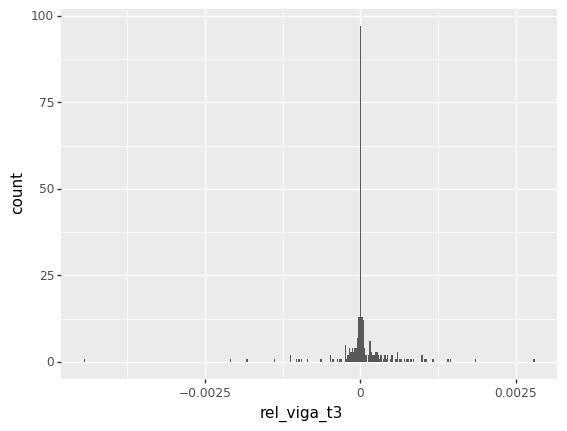

<ggplot: (80422030623)>

In [3]:
n = 100
y_0 = 0.8

sigma_y = np.sqrt((1 - y_0) * y_0 / n)
epsilon_y = norm.rvs(0, sigma_y, 250)

y = 1 / (y_0 + epsilon_y)
y_taylor2 = 1 / y_0 - epsilon_y / (y_0 ** 2)
y_taylor3 = 1 / y_0 - epsilon_y / (y_0 ** 2) + (epsilon_y ** 2) / (y_0 ** 3)

rel_viga_t2 = (y_taylor2 - y) / y
rel_viga_t3 = (y_taylor3 - y) / y

print(np.std(y))
print(np.std(y_taylor2))
print(np.std(y_taylor3))

(
    ggplot() + aes(x='rel_viga_t3') + geom_histogram()
)